In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')
import altair as alt
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

### Exploratory Data Analysis (EDA)

In [2]:
train_df=pd.read_csv('Titanic_train.csv')
test_df=pd.read_csv('Titanic_test.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


#### Data Preprocessing

In [7]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

In [8]:
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

In [9]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [10]:
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
fig1=alt.vconcat()
for i,col in enumerate(['Pclass','Age','SibSp','Parch','Fare']):
    hist=alt.Chart(train_df).mark_bar().encode(x=alt.X(col+':Q',bin=True),y=alt.Y('count()',title='Count'),tooltip=[alt.Tooltip(col+':Q',bin=True),'count()']).properties(title=f'Histogram of {col}')
    box=alt.Chart(train_df).mark_boxplot().encode(y=alt.Y(col+':Q')).properties(title=f'Boxplot of {col}')
    fig1|=hist|box

In [14]:
fig2=alt.vconcat()
for i,col in enumerate(['Sex','Embarked']):
    bar_count=alt.Chart(train_df).mark_bar().encode(x=alt.X(col+':N',axis=alt.Axis(title=col)),y=alt.Y('count()',title='Count'),tooltip=[col,'count()']).properties(title=f'Count of {col}')
    survival_rate=train_df.groupby(col)['Survived'].mean().reset_index()
    bar_survival=alt.Chart(survival_rate).mark_bar().encode(x=alt.X(col+':N',axis=alt.Axis(title=col)),y=alt.Y('Survived:Q',title='Survival Rate'),tooltip=[col,'Survived']).properties(title=f'Survival Rate by {col}')
    fig2|=bar_count|bar_survival

In [15]:
fig1

alt.HConcatChart(...)

In [16]:
fig2

alt.HConcatChart(...)

In [17]:
train_df.drop(['Name','Ticket'],axis=1,inplace=True)
test_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [18]:
train_df=pd.get_dummies(train_df,columns=['Sex','Embarked'],drop_first=True)
test_df=pd.get_dummies(test_df,columns=['Sex','Embarked'],drop_first=True)

### Building Predictive Models

In [19]:
x=train_df.drop('Survived',axis=1)
y=train_df['Survived']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


#### Building and training LightGBM model

In [22]:
lgb_model=lgb.LGBMClassifier()

In [23]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [24]:
lgb_preds=lgb_model.predict(x_test)

In [25]:
lgb_accuracy=accuracy_score(y_test,lgb_preds)

In [26]:
print(f'LightGBM Accuracy: {lgb_accuracy}')

LightGBM Accuracy: 0.8324022346368715


#### Building and training XGBoost model

In [27]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
xgb_preds=xgb_model.predict(x_test)

In [29]:
xgb_accuracy=accuracy_score(y_test,xgb_preds)

In [30]:
print(f'XGBoost Accuracy: {xgb_accuracy}')

XGBoost Accuracy: 0.7821229050279329


In [31]:
cv_scores=cross_val_score(xgb_model,x,y,cv=5)

In [32]:
print(f'XGBoost Cross-Validation Scores: {cv_scores}')
print(f'XGBoost Mean Cross-Validation Score: {cv_scores.mean()}')

XGBoost Cross-Validation Scores: [0.66480447 0.79775281 0.81460674 0.78089888 0.83707865]
XGBoost Mean Cross-Validation Score: 0.7790283095850856


#### Gridsearch

In [33]:
param_grid={'n_estimators':[50,100,150],'max_depth':[3,4,5],'learning_rate':[0.01,0.1,0.2]}

In [34]:
grid_search=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')

In [35]:
grid_search.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [36]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_}')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best Accuracy: 0.8215554579122465


In [37]:
best_xgb_model=xgb.XGBClassifier(**grid_search.best_params_)

In [38]:
best_xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
best_xgb_preds=best_xgb_model.predict(x_test)

In [40]:
best_xgb_accuracy=accuracy_score(y_test,best_xgb_preds)

In [41]:
print(f'Re-trained XGBoost Accuracy: {best_xgb_accuracy}')

Re-trained XGBoost Accuracy: 0.8547486033519553


#### Comparison between LGBM and XGBM

In [42]:
results_df=pd.DataFrame({'Model':['LGBM','XGBoost'],'Accuracy':[lgb_accuracy,xgb_accuracy]})

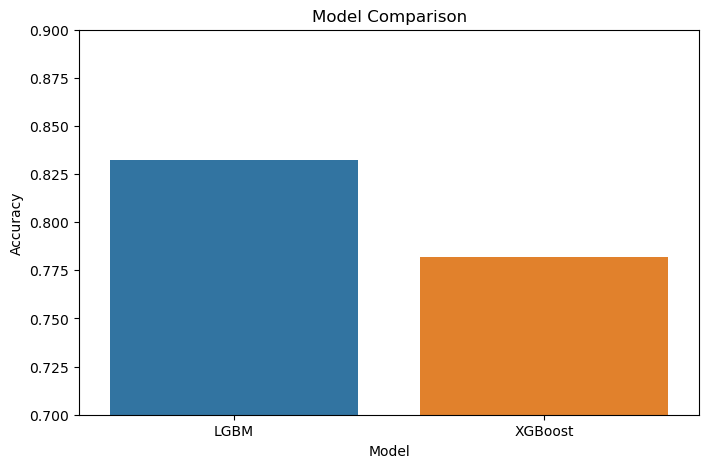

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model',y='Accuracy',data=results_df)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7,0.9)
plt.show()

#### Comparison of XGBM before and after tuning hyperparameters

In [44]:
results_df1=pd.DataFrame({'Model':['XGBoost','XGBoost (Tuned)'],'Accuracy':[xgb_accuracy,best_xgb_accuracy]})

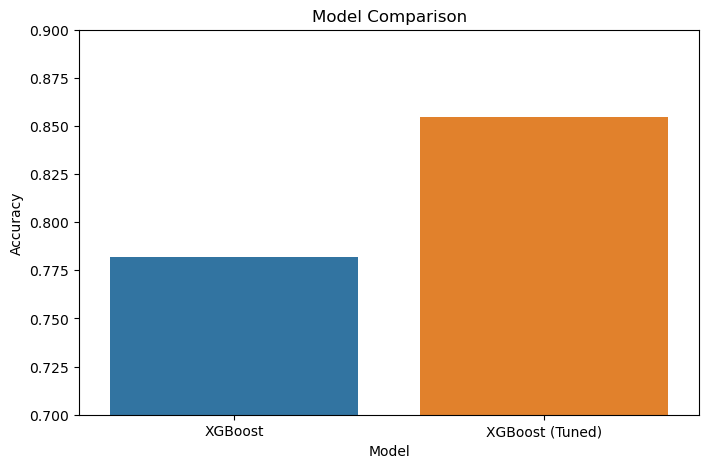

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model',y='Accuracy',data=results_df1)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 0.9)
plt.show()

In [46]:
results_df

,Model,Accuracy
0,LGBM,0.832402
1,XGBoost,0.782123


In [47]:
results_df1

,Model,Accuracy
0,XGBoost,0.782123
1,XGBoost (Tuned),0.854749
